In [25]:
from hypersurface import *
import sympy as sp
from pprint import pprint
#import multiprocessing
from multiprocessing import Process, Manager
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
ns = 4
k = 1
H = np.identity(ns, dtype=int)
H_rand_pd = np.zeros((ns,ns))
while not np.all(np.linalg.eigvals(H_rand_pd) > 0):
    H_rand = np.random.rand(ns, ns)
    H_rand_pd = H_rand*H_rand.transpose()
print(H_rand_pd)

[[0.68753683 0.19811952 0.19035478 0.00680075]
 [0.19811952 0.30177955 0.07690458 0.3089342 ]
 [0.19035478 0.07690458 0.93047206 0.17678066]
 [0.00680075 0.3089342  0.17678066 0.89606   ]]


In [3]:
z0, z1, z2, z3 = sp.symbols('z0, z1, z2, z3')
Z = [z0,z1,z2,z3]
f = z0**4 + z1**4 + z2**4 + z3**4
N = 100
integral_list = []
stdv_list = []

In [4]:
def integration(N, integral_list, seed=None):
    # Use a different seed
    np.random.seed(seed)
    HS = Hypersurface(Z, f, N)
    summation = 0
    for patch in HS.patches:
        for subpatch in patch.patches:
            sub_integral = subpatch.integrate(subpatch.get_FS_volume_form(H_rand_pd, k)/subpatch.get_FS_volume_form(H, k))
            summation += sub_integral
    integral = summation/HS.n_points
    #print(integral)
    integral_list.append(integral.real)

In [5]:
#pool = multiprocessing.Pool()
#res  = pool.map(integration, range(4))

In [5]:
def stdv(list):
    sum = 0
    for item in list:
        sum += (item - 1)**2
    stdv = math.sqrt(sum / len(list))
    return stdv

In [6]:
for N in range(100, 1100, 100):
    with Manager() as manager:
        integral_list = manager.list()  # <-- can be shared between processes.
        processes = []
        for i in range(50):
            p = Process(target=integration, args=(N, integral_list, N+i))  # Passing the list
            p.start()
            processes.append(p)
        for p in processes:
            p.join()
        #print(integral_list)
        integral_list = list(integral_list)

    int_stdv = stdv(integral_list)
    print(int_stdv)
    stdv_list.append(int_stdv)

0.07687704636222145
0.051919407533924364
0.050437571827529365
0.03117396465364479
0.03331276368662513
0.03488963542149888
0.027170269838774574
0.020637798058431373
0.02719492341512214
0.024485326182554567


In [9]:
def func_power(x, a, b):
    return a * x**b

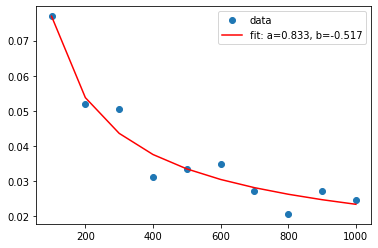

In [27]:
xdata = np.linspace(100, 1000, 10)
ydata = np.array(stdv_list)
plt.plot(xdata, ydata, "o", label='data')
popt, pcov = curve_fit(func_power, xdata, ydata)
plt.plot(xdata, func_power(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()